# Process Renovar NO2 Data according to reference station

## Constants and imports

In [1]:
input_data_directory = 'input/'
sensor_data_path = input_data_directory + 'alpha_no2_concsensor_dataframe_1hr.csv'
reference_data_path = input_data_directory + 'ref_air_quality_data_Vila_Moema.csv'
reference_column_name = 'Dióxido de Nitrogênio'

## Load Alphasense NO2 sensor data

In [2]:
import pandas as pd

sensor_data = pd.read_csv(sensor_data_path).sort_values(by='DateTime', ascending=True)
sensor_data.index = sensor_data['DateTime']
sensor_data = sensor_data.drop(columns='DateTime')
sensor_data

,latitude,longitude,measuring,Diff,value,Hour,Count,Std,% valid,Tag,GLOBAL_QTLE01,GLOBAL_QTLE99
DateTime,,,,,,,,,,,,
2022-11-20 13:30:00,-28.456899,-48.972999,101.3900,NaN,0.190778,13,1,NaN,25.0,LOWSAMPLES,22.923333,2375.0100
2022-11-20 14:30:00,NaN,NaN,NaN,NaN,NaN,14,0,NaN,0.0,LOWSAMPLES,21.932500,2379.1200
2022-11-20 15:30:00,NaN,NaN,NaN,NaN,NaN,15,0,NaN,0.0,LOWSAMPLES,20.010000,2381.6500
2022-11-20 16:30:00,NaN,NaN,NaN,NaN,NaN,16,0,NaN,0.0,LOWSAMPLES,17.882500,2387.0250
2022-11-20 17:30:00,NaN,NaN,NaN,NaN,NaN,17,0,NaN,0.0,LOWSAMPLES,20.123333,2312.4000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-21 17:30:00,-28.456899,-48.972999,553.4925,154.8975,1.041465,17,4,302.713810,100.0,VALID,20.123333,2312.4000
2023-04-21 18:30:00,-28.456899,-48.972999,977.5825,25.3625,1.839444,18,4,12.234169,100.0,VALID,20.543333,2260.4600
2023-04-21 19:30:00,-28.456899,-48.972999,1003.0350,20.1000,1.887336,19,4,49.619853,100.0,VALID,24.485000,2214.6725


## Load reference sensor data

In [3]:
import pandas as pd

reference_data = pd.read_csv(reference_data_path).sort_values(by='DateTime', ascending=True)
reference_data.index = reference_data['DateTime']
reference_data = reference_data.drop(columns='DateTime')[reference_column_name]
reference_data.head()

DateTime
2022-01-01 02:30:00    4.02
2022-01-01 03:30:00    4.38
2022-01-01 04:30:00    8.66
2022-01-01 05:30:00    8.57
2022-01-01 06:30:00    8.10
Name: Dióxido de Nitrogênio, dtype: float64

### Select period of interest according to NO2 sensor data

In [4]:
reference_data = reference_data[reference_data.index >= sensor_data.index[0]]
reference_data = reference_data[reference_data.index <= sensor_data.index[-1]]
reference_data

DateTime
2022-11-20 13:30:00    22.26
2022-11-20 14:30:00    17.18
2022-11-20 15:30:00    24.64
2022-11-20 16:30:00    21.83
2022-11-20 17:30:00    13.39
                       ...  
2023-02-08 12:30:00    25.29
2023-02-08 13:30:00     9.65
2023-02-08 14:30:00     7.76
2023-02-08 15:30:00    12.24
2023-02-08 16:30:00      NaN
Name: Dióxido de Nitrogênio, Length: 1924, dtype: float64

## Append reference column to NO2 sensor Data

In [5]:
sensor_data['reference'] = reference_data
sensor_data

,latitude,longitude,measuring,Diff,value,Hour,Count,Std,% valid,Tag,GLOBAL_QTLE01,GLOBAL_QTLE99,reference
DateTime,,,,,,,,,,,,,
2022-11-20 13:30:00,-28.456899,-48.972999,101.3900,NaN,0.190778,13,1,NaN,25.0,LOWSAMPLES,22.923333,2375.0100,22.26
2022-11-20 14:30:00,NaN,NaN,NaN,NaN,NaN,14,0,NaN,0.0,LOWSAMPLES,21.932500,2379.1200,17.18
2022-11-20 15:30:00,NaN,NaN,NaN,NaN,NaN,15,0,NaN,0.0,LOWSAMPLES,20.010000,2381.6500,24.64
2022-11-20 16:30:00,NaN,NaN,NaN,NaN,NaN,16,0,NaN,0.0,LOWSAMPLES,17.882500,2387.0250,21.83
2022-11-20 17:30:00,NaN,NaN,NaN,NaN,NaN,17,0,NaN,0.0,LOWSAMPLES,20.123333,2312.4000,13.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-21 17:30:00,-28.456899,-48.972999,553.4925,154.8975,1.041465,17,4,302.713810,100.0,VALID,20.123333,2312.4000,NaN
2023-04-21 18:30:00,-28.456899,-48.972999,977.5825,25.3625,1.839444,18,4,12.234169,100.0,VALID,20.543333,2260.4600,NaN
2023-04-21 19:30:00,-28.456899,-48.972999,1003.0350,20.1000,1.887336,19,4,49.619853,100.0,VALID,24.485000,2214.6725,NaN


### Plot reference and sensor data

<Axes: xlabel='DateTime'>

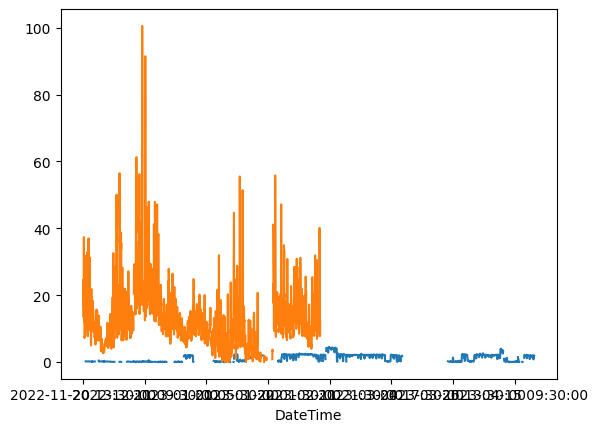

In [6]:
sensor_data['value'].plot()
sensor_data['reference'].plot()

## Separate reference data and valid sensor data

In [7]:
data = sensor_data[sensor_data.index <= reference_data.index[-1]][sensor_data['Tag'] == 'VALID'][['value', 'reference']]
data

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_23737/1722251259.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = sensor_data[sensor_data.index <= reference_data.index[-1]][sensor_data['Tag'] == 'VALID'][['value', 'reference']]


,value,reference
DateTime,,
2022-11-21 11:30:00,0.176346,16.79
2022-11-21 12:30:00,0.171742,16.71
2022-11-21 13:30:00,0.173373,12.13
2022-11-21 14:30:00,0.170757,12.73
2022-11-21 15:30:00,0.179441,21.07
...,...,...
2023-02-08 12:30:00,0.573637,25.29
2023-02-08 13:30:00,0.807499,9.65
2023-02-08 14:30:00,0.844393,7.76


## Plot sensor vs. reference

Spearmans correlation coefficient: -0.15
Samples are correlated (reject H0) p=0.00
Kendall correlation coefficient: -0.15
Samples are correlated (reject H0) p=0.00


Text(0.5, 0.9, 'Coeficiente de Kendall=-0.10, p<0.05')

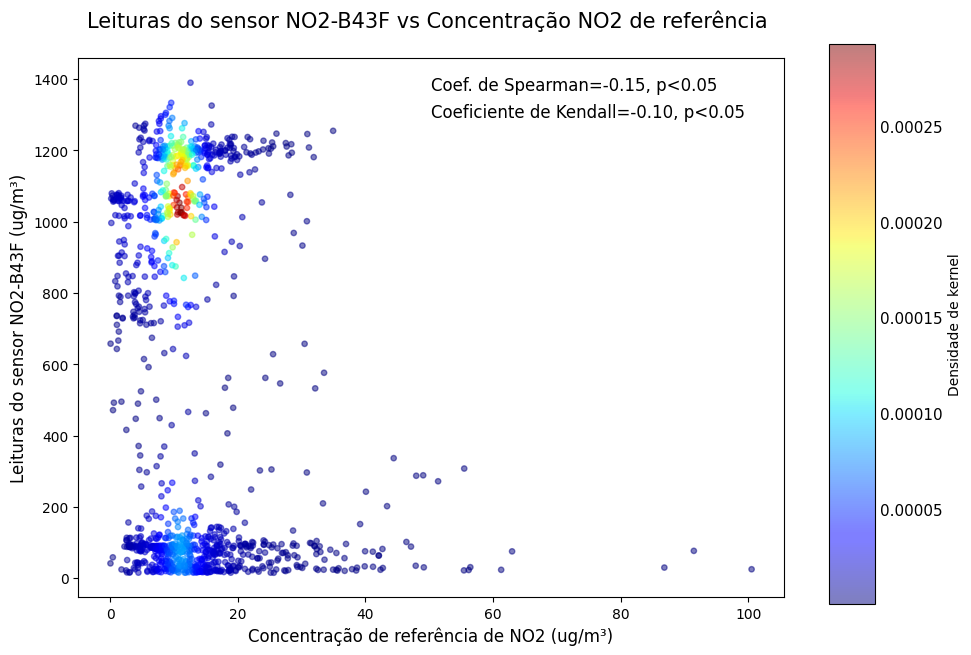

In [8]:
from scipy.stats import kendalltau, spearmanr, gaussian_kde
import matplotlib.pyplot as plt
import numpy as np

median_reference = sensor_data['reference'].median()
median_measuring = sensor_data['measuring'].median()

fig, ax = plt.subplots(figsize=(1.3*7,7))
xy = np.vstack([sensor_data['reference'].fillna(value=median_reference), sensor_data['measuring'].fillna(value=median_measuring)])
z = gaussian_kde(xy)(xy)

plt.scatter(sensor_data['reference'], sensor_data['measuring'], c=z, cmap='jet', s=15, alpha=.5)

plt.title('Leituras do sensor NO2-B43F vs Concentração NO2 de referência \n', 
          fontdict={'fontsize':15})
plt.xlabel('Concentração de referência de NO2 (ug/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
plt.ylabel('Leituras do sensor NO2-B43F (ug/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(sensor_data['reference'], sensor_data['measuring'], 
                    nan_policy='omit')

print('Spearmans correlation coefficient: %.2f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.2f' % p)
else:
	print('Samples are correlated (reject H0) p=%.2f' % p)

kendall, pken = kendalltau(sensor_data['reference'], sensor_data['measuring'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.2f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.2f' % p)
else:
	print('Samples are correlated (reject H0) p=%.2f' % p)

cax = plt.axes([0.95, 0.1, 0.05, 0.8])
cbar = plt.colorbar(orientation='vertical', cax=cax, label="Densidade de kernel")
cbar.ax.tick_params(labelsize=11, length=0)

string = 'Coef. de Spearman=%.2f, p<0.05' % coef
plt.text(0.5, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Coeficiente de Kendall=%.2f, p<0.05' % kendall
plt.text(0.5, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)